<a href="https://colab.research.google.com/github/nuramrina46/Skripsi2/blob/main/128_vgg_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [15]:
ls

'128 vgg 16.ipynb'   Pneugrey/                     Untitled0.ipynb
 2pneumonia/        'pneumonia VGG 16 fiX.ipynb'   Untitled1.ipynb
 Dataset/           'Pneumonia VGG 16.ipynb'       Untitled2.ipynb
 Dataset1/          'pneumonia vgg 19.ipynb'


In [16]:
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.layers import BatchNormalization
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from matplotlib import pyplot as plt
from imutils import paths
import numpy as np
import os

In [17]:
print("[INFO] loading images...")
imagePaths = paths.list_images("Dataset")
data = []
labels = []

[INFO] loading images...


In [18]:
for imagePaths in imagePaths:
    a = Image.open(imagePaths)
    image = np.array(a.resize((100,100))) / 255.0
    data.append(image)
    
    label = imagePaths.split(os.path.sep) [-2]
    labels.append(label)

In [19]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np

class MyLabelBinarizer(LabelBinarizer):
    def transform(self, label):
      nilaiy = super().transform(label)
      if self.y_type_== 'binary':
        return np.hstack((nilaiy, 1-nilaiy))
      else:
        return nilaiy
    def inverse_transform(self, nilaiy, threshold=None):
      if self.y_type_ == 'binary':
          return super().inverse_transform(nilaiy[:, 0], threshold)
      else:
          return super().inverse_transform(nilaiy, threshold)

      

lb = MyLabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [20]:
(trainX,testX, trainY, testY) = train_test_split(np.array(data),np.array(labels), test_size=0.25, random_state=42)
print(trainX.shape)
print(testX.shape)

(750, 100, 100)
(250, 100, 100)


In [21]:
def vgg16(num_classes):

    vgg16 = Sequential()

    vgg16.add(Convolution2D(input_shape=(100,100,1),filters=64,kernel_size=(3,3),padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer1 32*32*64
    vgg16.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer2 16*16*64
    vgg16.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer3 16*16*128
    vgg16.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same",))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer4 8*8*128
    vgg16.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer5 8*8*256
    vgg16.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer6 8*8*256
    vgg16.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer7 4*4*256
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer8 4*4*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer9 4*4*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer10 2*2*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    #layer11 2*2*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))  
    vgg16.add(Activation('relu')) 
    vgg16.add(BatchNormalization())       
    #layer12 2*2*512
    vgg16.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same"))
    vgg16.add(Activation('relu'))
    vgg16.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    vgg16.add(BatchNormalization())
    #layer13 1*1*512
    vgg16.add(Flatten())
    vgg16.add(Dense(units=4096))
    vgg16.add(Activation('relu')) 
    vgg16.add(BatchNormalization())
    vgg16.add(Dropout(0.5))
    #layer14 4096
    vgg16.add(Dense(units=4096))
    vgg16.add(Activation('relu')) 
    vgg16.add(BatchNormalization())
    vgg16.add(Dropout(0.5))
    #layer16 4096
    vgg16.add(Dense(units=1000))
    vgg16.add(Activation('relu'))
    vgg16.add(BatchNormalization())
    vgg16.add(Dropout(0.5)) 
    #layer16 1000
    vgg16.add(Dense(2, activation="sigmoid"))

    return vgg16

In [22]:
num_classes=2
vgg16=vgg16(num_classes)
vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 activation_16 (Activation)  (None, 100, 100, 64)      0         
                                                                 
 batch_normalization_16 (Bat  (None, 100, 100, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 activation_17 (Activation)  (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [23]:
#setting hyperparameter, menggunakan Adam
opt = RMSprop(lr=0.0001)
vgg16.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 100, 100, 64)      640       
                                                                 
 activation_16 (Activation)  (None, 100, 100, 64)      0         
                                                                 
 batch_normalization_16 (Bat  (None, 100, 100, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 100, 100, 64)      36928     
                                                                 
 activation_17 (Activation)  (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 512)       1180160   
                                                                 
 activation_23 (Activation)  (None, 12, 12, 512)       0         
                                                                 
 batch_normalization_23 (Bat  (None, 12, 12, 512)      2048      
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 512)       2359808   
                                                                 
 activation_24 (Activation)  (None, 12, 12, 512)       0         
                                                                 
 batch_normalization_24 (Bat  (None, 12, 12, 512)      2048      
 chNormalization)                                                
                                                                 
 conv2d_22

In [24]:
#training data
H = vgg16.fit(trainX, trainY, validation_data=(testX, testY), epochs=30, batch_size=16)

Epoch 1/30
47/47 [==============================] - 438s 9s/step - loss: 0.4199 - accuracy: 0.8640 - val_loss: 0.7852 - val_accuracy: 0.4880
Epoch 2/30
47/47 [==============================] - 415s 9s/step - loss: 0.2992 - accuracy: 0.9160 - val_loss: 1.5269 - val_accuracy: 0.4880
Epoch 3/30
47/47 [==============================] - 417s 9s/step - loss: 0.2576 - accuracy: 0.9307 - val_loss: 3.9915 - val_accuracy: 0.4880
Epoch 4/30
47/47 [==============================] - 414s 9s/step - loss: 0.3324 - accuracy: 0.9173 - val_loss: 6.0817 - val_accuracy: 0.4880
Epoch 5/30
47/47 [==============================] - 427s 9s/step - loss: 0.2547 - accuracy: 0.9293 - val_loss: 7.0824 - val_accuracy: 0.4880
Epoch 6/30
47/47 [==============================] - 420s 9s/step - loss: 0.2877 - accuracy: 0.9200 - val_loss: 7.5348 - val_accuracy: 0.4880
Epoch 7/30
47/47 [==============================] - 413s 9s/step - loss: 0.1918 - accuracy: 0.9467 - val_loss: 8.9278 - val_accuracy: 0.4880
Epoch 8/30
47

In [25]:
print("[INFO] evaluating network...")
predictions = vgg16.predict(testX, batch_size=16)
pred=predictions.argmax(axis=1)
testY_argm=testY.argmax(axis=1)

[INFO] evaluating network...


In [26]:
print(classification_report(testY_argm,pred,target_names=lb.classes_))

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.98       122
   Pneumonia       0.97      0.98      0.98       128

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [27]:
test_score = vgg16.evaluate(testX, testY) 
print("Test Loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

8/8 [==============================] - 30s 4s/step - loss: 0.1470 - accuracy: 0.9760
Test Loss 0.1470, accuracy 97.60%


In [28]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap='Blues'):
  if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print("Normalized confusion matrix")
  else:
     print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

Normalized confusion matrix
[[0.97 0.03]
 [0.02 0.98]]


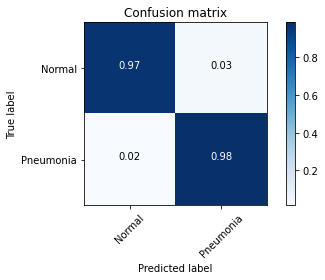

Confusion matrix, without normalization
[[118   4]
 [  2 126]]


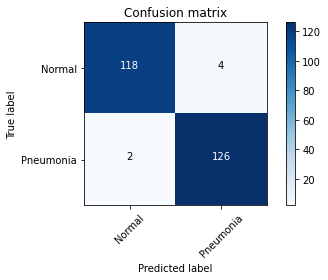

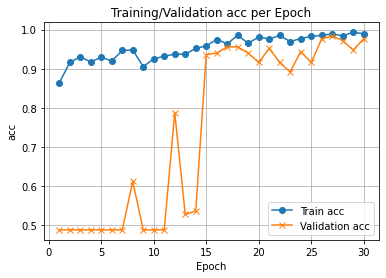

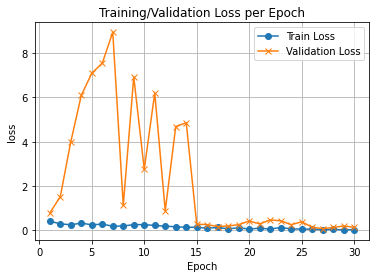

In [29]:
cnf_matrix = confusion_matrix(testY_argm, pred)
np.set_printoptions(precision=2)

# Plot non/normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
classes=lb.classes_, normalize=True)
plt.show()

plt.figure()
plot_confusion_matrix(cnf_matrix,
classes=lb.classes_, normalize=False)
plt.show()

f, ax = plt.subplots()
ax.plot([None] + H.history['accuracy'], 'o-')
ax.plot([None] + H.history['val_accuracy'], 'x-')

ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.grid(True)

f, ax = plt.subplots()
ax.plot([None] + H.history['loss'], 'o-')
ax.plot([None] + H.history['val_loss'], 'x-')
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('loss')
plt.grid(True)